In [1]:
import numpy as np
import scipy.stats as sp
import pandas as pd
import sklearn.preprocessing as sk

In [2]:
data = pd.read_csv('gwas_data.txt', delim_whitespace=True, low_memory=False)
df = pd.DataFrame(data)

In [3]:
y = df['Phenotype']
X = df.drop('Phenotype', 1)
X = sk.scale(X)
N = X.shape

In [4]:
beta = np.dot(np.transpose(X),y)/N[0]
S = np.zeros(N[1])
for i in range(N[1]):
    e = y-np.mean(y)-beta[i]*X[:,i]
    sigma = np.sqrt(np.dot(e,e)/(N[0]-2))
    S[i] = beta[i]*np.sqrt(N[0])/sigma

_S = [-s if s>0 else s for s in S]
pvalue = sp.norm.cdf(_S)*2

In [5]:
alpha = 0.05/N[1]
threshold = sp.norm.ppf(alpha/2)
sig_snp_index = np.where(_S<threshold)
sig_snp = sig_snp_index[0].tolist()

In [6]:
_X = X
for i in range(N[0]):
    _X[i] /= np.linalg.norm(X[i])

K = np.dot(_X, np.transpose(_X))
_K = np.triu(K)
avg_k = np.sum(_K)-1
avg_k /= ((N[0]*(N[0]-1))/2)

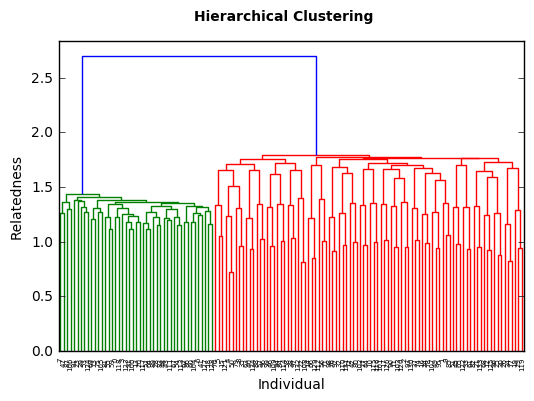

In [7]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram

_K = (1-K)
_K[range(N[0]), range(N[0])] = 0
data_link = linkage(_K, method='average')
dendrogram(data_link)
plt.xlabel('Individual')
plt.ylabel('Relatedness')
plt.suptitle('Hierarchical Clustering', fontweight='bold', fontsize=10);
plt.show()

In [8]:
fout = open('PA2_304743326.txt', 'w+')
header = 'UID:304743326\n'+'email:a5834929@gmail.com\n'+'Undergrad or Grad:Grad\n'
fout.write(header+'<A>\n')
for i in range(len(pvalue)):
    fout.write('SNP%04d:%.10f,%.10f\n' % (i, beta[i], pvalue[i]))
fout.write('</A>\n<B>\n')
for i in sig_snp:
    fout.write('SNP%04d\n' % i)
fout.write('</B>\n<C>\nAVG_K:%.10f\n</C>' % avg_k)
fout.close()